# One photon can simultaneously excite two atoms

The quantum system being considered here consists of two emitters (two level systems), coupled to a single cavity mode. We consider the ultra-strong coupling (USC) regime where the rotating-wave approximation is no longer valid and we cannot remove the excitation number non-conserving terms from the Hamiltonian. 

Therefore, achieving the USC regime allows coherent processes where one photon at the right frequency can excite multiple atoms. 

The Hamiltonian of the system is given by - 

$$
H = H_q + H_c + \lambda X (\cos \theta (\sum_i \sigma_x^{(i)}) + \sin \theta (\sum_i \sigma_z^{(i)}))
$$

where $H_q = \frac{\omega_q}{2} \sum_i \sigma_z^{(i)}$ and $H_c = \omega_c a^{\dagger} a$

For $\theta \neq 0$, parity is not conserved. 

In [613]:
%matplotlib inline
import matplotlib.pyplot as plt
from qutip import *
import numpy as np
from matplotlib import rc
import scipy.linalg as la
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

## 2 qubit case

We want to drive a transition between the states $|g,g,0 \rangle$ and $|e, e, 0 \rangle$. These states are not directly coupled by the Hamiltonian but they are coupled by third-order processes. 

The authors derived an effective coupling rate ($\Omega_{eff}$) between these states -

$$
\Omega_{eff}/\omega_q = \frac{8}{3} \frac{\lambda}{\omega_q}^3 \sin \theta \cos^2 \theta
$$

The excitation number non-conversing Hamiltonian now couples these two states. That means there will be a characteristic anti-crossing in the eigenvalue spectrum around the cavity frequencies where these two states are coupled. The minimum splitting at this anti-crossing will give the exact value of $\Omega_{eff}$.

To find this anti-crossing, we numerically diagonalize the Hamiltonian and look for apparent crossings in the spectrum among lines that show behaviour characteristic to the states $|g,g,1 \rangle$ (energy scales as $\omega_c$ at large detunings $\delta = \omega_c - \omega_q$), and $|e,e,0 \rangle$ (energy stays constant around $2 \omega_q$ for large $\delta$)

We find an apparent crossing around $E = 2 \omega_q = \omega_c$ (Figure 2(a)). Upon zooming in, it is clear that it is indeed an anti-crossing as expected. (Figure 2(b))

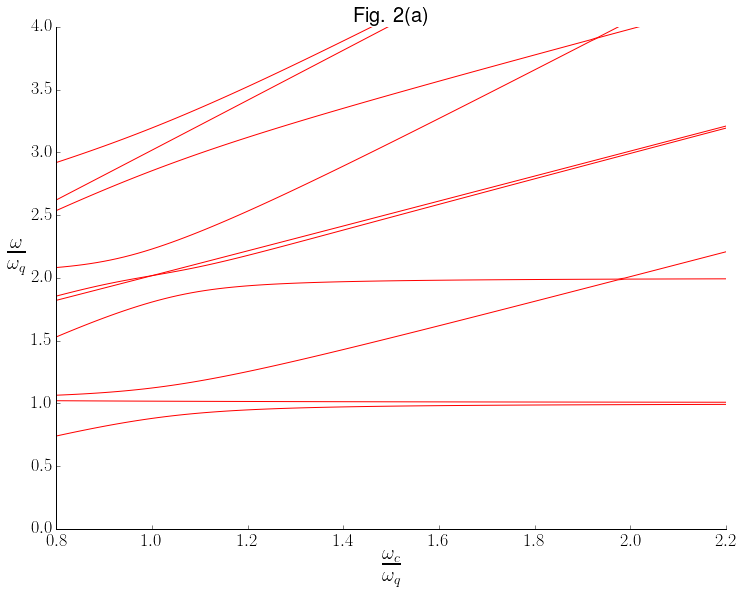

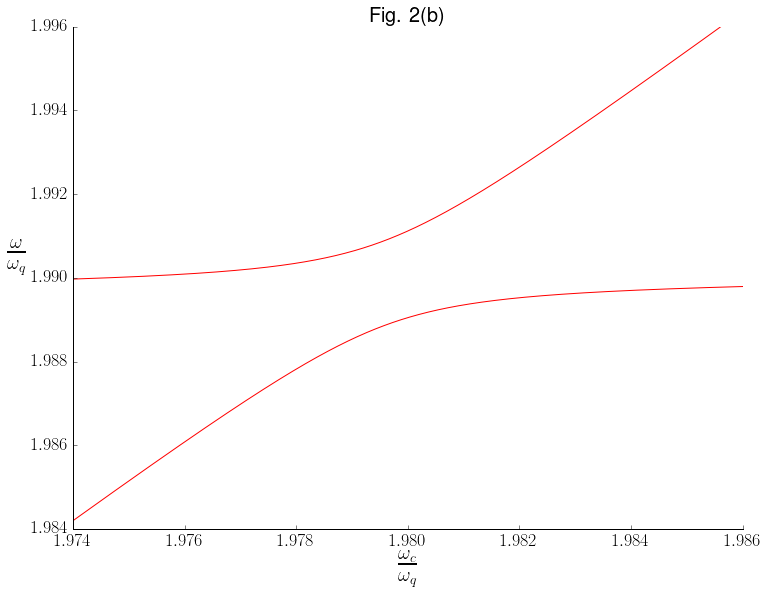

In [614]:
# Parameters

wq = 1
N = 3
lamb = 0.1
theta = np.pi/6

# Operator definitions

a = tensor(qeye(2), qeye(2), destroy(N))
X = a + a.dag()
sz1 = -tensor(sigmaz(), qeye(2), qeye(N))
sz2 = -tensor(qeye(2), sigmaz(), qeye(N))
sx1 = tensor(sigmax(), qeye(2), qeye(N))
sx2 = tensor(qeye(2), sigmax(), qeye(N))
sy1 = tensor(sigmay(), qeye(2), qeye(N))
sy2 = tensor(qeye(2), sigmay(), qeye(N))
sigma1 = tensor(destroy(2), qeye(2), qeye(N))
sigma2 = tensor(qeye(2), destroy(2), qeye(N))
C1 = sigma1 + sigma1.dag()
C2 = sigma2 + sigma2.dag()

Hq = wq/2 * (sz1 + sz2) 
Hi = lamb * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))

evals_wc_sweep = []

wclist = np.linspace(0.8, 2.2, 100)

for wc in wclist:
    
    Hc = wc * a.dag() * a
    H = Hq + Hi + Hc 
    
    evals, ekets = H.eigenstates()
    
    evals_shifted = [np.real(evals)[n] - np.real(evals)[0] for n in range(1, len(evals))]
    
    evals_wc_sweep.append(evals_shifted)

evals_wc_sweep = np.array(evals_wc_sweep)

fig, ax = plt.subplots(figsize=(12,9))

for n in range(10):
    
    ax.plot(wclist, evals_wc_sweep[:,n], 'r')
    
ax.set_xlim([0.8, 2.2]);
ax.set_ylim([0, 4]);
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18)
plt.title('Fig. 2(a)', fontsize = 20, fontweight = 'semibold')
ax.set_ylabel(r'$\frac{\omega}{\omega_q}$', fontsize=28, fontweight = 550, rotation = 'horizontal', ha = 'right')
ax.set_xlabel(r'$\frac{\omega_c}{\omega_q}$', fontsize=28, fontweight = 550)

wclist = np.linspace(1.974, 1.986, 1000)

evals_wc_sweep = []

for wc in wclist:
    
    Hc = wc * a.dag() * a
    H = Hq + Hi + Hc 
    
    evals, ekets = H.eigenstates()    
    evals_shifted = [np.real(evals)[n] - np.real(evals)[0] for n in range(1, len(evals))]

    evals_wc_sweep.append(evals_shifted)

evals_wc_sweep = np.array(evals_wc_sweep)

fig, ax = plt.subplots(figsize=(12,9))

for n in [2,3]:
    ax.plot(wclist, evals_wc_sweep[:,n], 'r')

ax.set_ylim([1.984, 1.996]);
ax.set_xlim([1.974, 1.986]);
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18)
plt.title('Fig. 2(b)', fontsize = 20, fontweight = 'semibold')
ax.set_ylabel(r'$\frac{\omega}{\omega_q}$', fontsize=28, fontweight = 550, rotation = 'horizontal', ha = 'right')
ax.set_xlabel(r'$\frac{\omega_c}{\omega_q}$', fontsize=28, fontweight = 550)

In [615]:
w34 = evals_wc_sweep[:,3] - evals_wc_sweep[:,2]

wc_min = wclist[list(w34).index(min(w34))]

w30 = evals_wc_sweep[list(w34).index(min(w34)),2]
w40 = evals_wc_sweep[list(w34).index(min(w34)),3]

Now we set the cavity frequency to be the value at which the splitting is minimum. We try to simulate an actual photodetection experiment's results. We drive the cavity with a Gaussian pulse with $\omega_d = \frac{\omega_{30} + \omega_{40}}{2}$. We also consider the presence of a Kerr non-linearity that will activate a photon blockade. This is useful because driving the transition far from resonance means the anharmonicity is low and higher rungs can be excited. The photon blockade due to the presence of the shifts due to the non-linearity prevents this and ensures that the drive excites the system that starts from $|g,g,0 \rangle$ into $|g,g,1 \rangle$ and no further. Then, the system's effective dynamics take over to cause what are effectively Rabi oscillations between $|g,g,1 \rangle$ and $|e,e,0 \rangle$. 

The time-dependent Schrödinger equation is solved by using the master equation solver provided by qutip. 

The experimental quantities that we observe are the output photon flux $\langle \hat{X}^{-} \hat{X}^{+} \rangle$, the population of emitter 1, $\langle \hat{C_1}^{-} \hat{C_1}^{+} \rangle$, and the auto-correlation between the two emitters' populations, $\langle \hat{C_1}^{-} \hat{C_2}^{-} \hat{C_2}^{+} \hat{C_1}^{+}  \rangle$. 

In Figure 3(a), we observe the Rabi oscillations that we expect. When the photon flux is at a low, the population of emitter 1 and the correlation peak. This suggests that both the emitters are excited at the same time and that we are indeed driving the $|g,g,1 \rangle \rightarrow |e,e,0 \rangle$ transition. 

In Figure 3(b), to make the simulation more realistic, we include a decay rate for the cavity $\kappa$ and a spontaneous emission decay rate for the emitters $\gamma$. We set $\kappa = \gamma$. As expected, the Rabi nutations till occur but die down with time as the dephasing occurs.

In [616]:
# Parameters

mu = 0.006
A = 7
wc = wc_min
tau = 1/(4*(w40-w30))
wd = (w30 + w40)/2

# Kerr and other Hamiltonians

Hc = wc * a.dag() * a
Horig = Hq + Hi + Hc
Hk = mu * a.dag() * a.dag() * a * a
H0 = Horig + Hk

Hdrive = X

def coeff(t, args):
    return A * np.cos(wd * t) * np.exp(-0.5 * (t / tau) ** 2)/(tau * np.sqrt(2*np.pi)) 

# omegaEff = (8/3) * ((lamb)**3) * np.sin(theta) * (np.cos(theta)**2)

omegaEff = (w40-w30)/2;

evals, ekets = H0.eigenstates()
evals_shifted = [ (np.real(evals)[n] - np.real(evals)[0]) for n in range(1, len(evals))]

count = 0

for j in range(len(ekets)):
    
    for k in range(len(ekets)):
        
        if k > j : 
            
            if count == 0 :
                
                Xplus = (ekets[j].dag() * X * ekets[k]).full()[0,0] * (ekets[j] * ekets[k].dag())
                Cplus1 = (ekets[j].dag() * C1 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus2 = (ekets[j].dag() * C2 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                
            else :
                
                Xplus = Xplus +  (ekets[j].dag() * X * ekets[k]).full()[0,0] * (ekets[j] * ekets[k].dag())
                Cplus1 = Cplus1 + (ekets[j].dag() * C1 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus2 = Cplus2 + (ekets[j].dag() * C2 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
            
            count += 1;

Xminus = Xplus.dag()
Cminus1 = Cplus1.dag()
Cminus2 = Cplus2.dag()

H = [H0, [Hdrive, coeff]]

In [617]:
t = (1/omegaEff) * np.linspace(0, 2 * np.pi, 6000)

psi0 = tensor(basis(2,0), basis(2,0), basis(N,0))

c_ops = []

output = mesolve(H, psi0, t, c_ops, [Xminus * Xplus, Cminus1 * Cplus1, Cminus1 * Cminus2 * Cplus2 * Cplus1])

kappa = 4e-5;
c_ops = [np.sqrt(kappa) * Xplus, np.sqrt(kappa)* Cplus1, np.sqrt(kappa) * Cplus2]

output2 = mesolve(H, psi0, t, c_ops, [Xminus * Xplus, Cminus1 * Cplus1, Cminus1 * Cminus2 * Cplus2 * Cplus1])

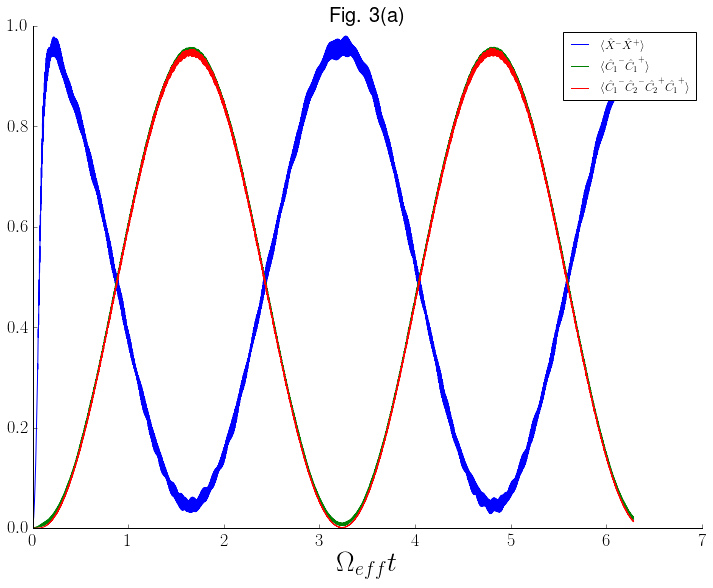

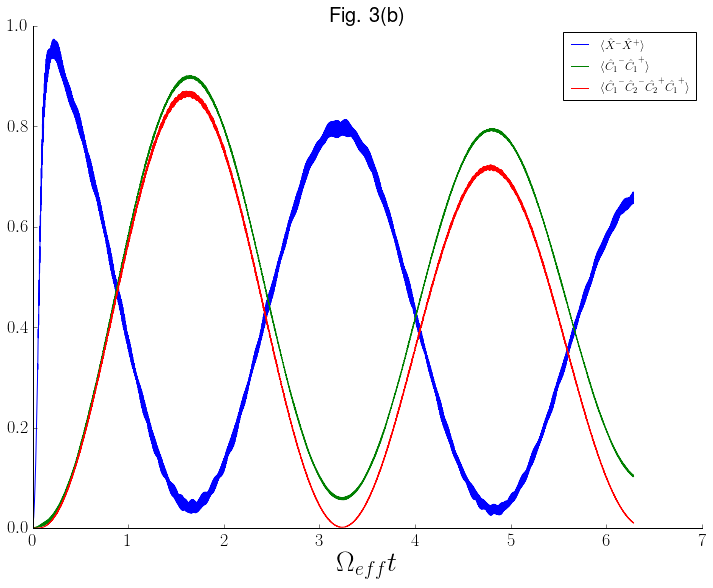

In [618]:
fig, ax = plt.subplots(figsize=(12,9))

result = output
ax.plot(result.times*omegaEff, result.expect[0], label = r'$\langle \hat{X}^{-} \hat{X}^{+} \rangle$', linestyle = '-');
ax.plot(result.times*omegaEff, result.expect[1], label = r'$\langle \hat{C_1}^{-} \hat{C_1}^{+} \rangle$');
ax.plot(result.times*omegaEff, result.expect[2], label = r'$\langle \hat{C_1}^{-} \hat{C_2}^{-} \hat{C_2}^{+} \hat{C_1}^{+}  \rangle$');

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18)
ax.legend()
plt.title('Fig. 3(a)', fontsize = 20, fontweight = 'semibold')
ax.set_xlabel(r'$\Omega_{eff} t$', fontsize=28, fontweight = 550)

fig, ax = plt.subplots(figsize=(12,9))

result = output2
ax.plot(result.times*omegaEff, result.expect[0], label = r'$\langle \hat{X}^{-} \hat{X}^{+} \rangle$', linestyle = '-');
ax.plot(result.times*omegaEff, result.expect[1], label = r'$\langle \hat{C_1}^{-} \hat{C_1}^{+} \rangle$');
ax.plot(result.times*omegaEff, result.expect[2], label = r'$\langle \hat{C_1}^{-} \hat{C_2}^{-} \hat{C_2}^{+} \hat{C_1}^{+}  \rangle$');

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18)
ax.legend()
plt.title('Fig. 3(b)', fontsize = 20, fontweight = 'semibold')
ax.set_xlabel(r'$\Omega_{eff} t$', fontsize=28, fontweight = 550)

## 4 qubit case

Here, we do the same analysis for the two qubit case. 

In [580]:
# Parameters

wq = 1
N = 3
lamb = 0.1
theta = np.pi/6

# Operator definitions

a = tensor(qeye(2), qeye(2), qeye(2), qeye(2), destroy(N))
X = a + a.dag()

sz1 = -tensor(sigmaz(), qeye(2), qeye(2), qeye(2), qeye(N))
sz2 = -tensor(qeye(2), sigmaz(), qeye(2), qeye(2), qeye(N))
sz3 = -tensor(qeye(2), qeye(2), sigmaz(), qeye(2), qeye(N))
sz4 = -tensor(qeye(2), qeye(2), qeye(2), sigmaz(), qeye(N))

sx1 = tensor(sigmax(), qeye(2), qeye(2), qeye(2), qeye(N))
sx2 = tensor(qeye(2), sigmax(), qeye(2), qeye(2), qeye(N))
sx3 = tensor(qeye(2), qeye(2), sigmax(), qeye(2), qeye(N))
sx4 = tensor(qeye(2), qeye(2), qeye(2), sigmax(), qeye(N))

sigma1 = tensor(destroy(2), qeye(2), qeye(2), qeye(2), qeye(N))
sigma2 = tensor(qeye(2), destroy(2), qeye(2), qeye(2), qeye(N))
sigma3 = tensor(qeye(2), qeye(2), destroy(2), qeye(2), qeye(N))
sigma4 = tensor(qeye(2), qeye(2), qeye(2), destroy(2), qeye(N))

C1 = sigma1 + sigma1.dag()
C2 = sigma2 + sigma2.dag()
C3 = sigma3 + sigma3.dag()
C4 = sigma4 + sigma4.dag()

Hq = wq/2 * (sz1 + sz2 + sz3 + sz4) 
Hi = lamb * X * (np.cos(theta) * (sx1 + sx2 + sx3 + sx4) + np.sin(theta) * (sz1 + sz2 + sz3 + sz4))

evals_wc_sweep = []

wclist = np.linspace(1, 7, 100)

for wc in wclist:
    
    Hc = wc * a.dag() * a
    H = Hq + Hi + Hc 
    
    evals, ekets = H.eigenstates()
    
    evals_shifted = [np.real(evals)[n] - np.real(evals)[0] for n in range(1, len(evals))]
    
    evals_wc_sweep.append(evals_shifted)

evals_wc_sweep = np.array(evals_wc_sweep)

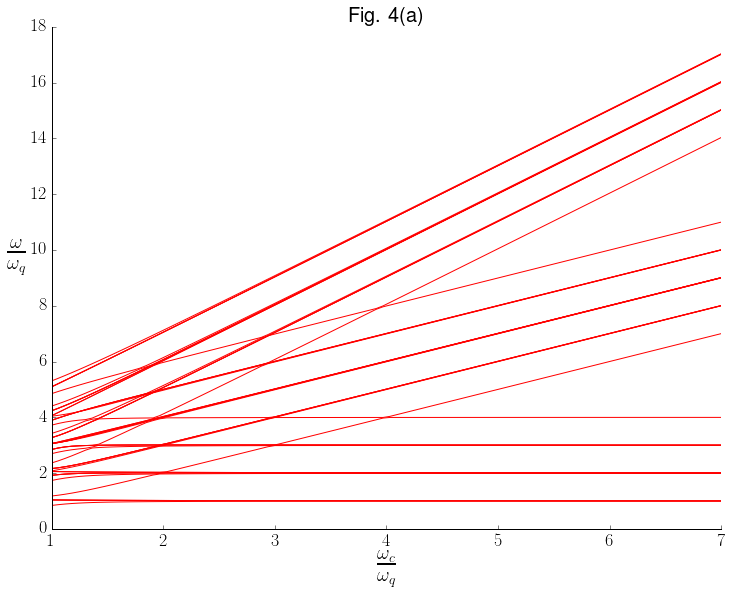

In [581]:
fig, ax = plt.subplots(figsize=(12,9))

for n in range(46):
    
    ax.plot(wclist, evals_wc_sweep[:,n], 'r')
    
ax.set_xlim([1, 7]);
# ax.set_ylim([3.9, 4.05]);
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18)
plt.title('Fig. 4(a)', fontsize = 20, fontweight = 'semibold')
ax.set_ylabel(r'$\frac{\omega}{\omega_q}$', fontsize=28, fontweight = 550, rotation = 'horizontal', ha = 'right')
ax.set_xlabel(r'$\frac{\omega_c}{\omega_q}$', fontsize=28, fontweight = 550)

In [593]:
wclist = np.linspace(3.992, 3.9922, 1000)

evals_wc_sweep = []

for wc in wclist:
    
    Hc = wc * a.dag() * a
    H = Hq + Hi + Hc 
    
    evals, ekets = H.eigenstates()    
    evals_shifted = [np.real(evals)[n] - np.real(evals)[0] for n in range(1, len(evals))]

    evals_wc_sweep.append(evals_shifted)

evals_wc_sweep = np.array(evals_wc_sweep)

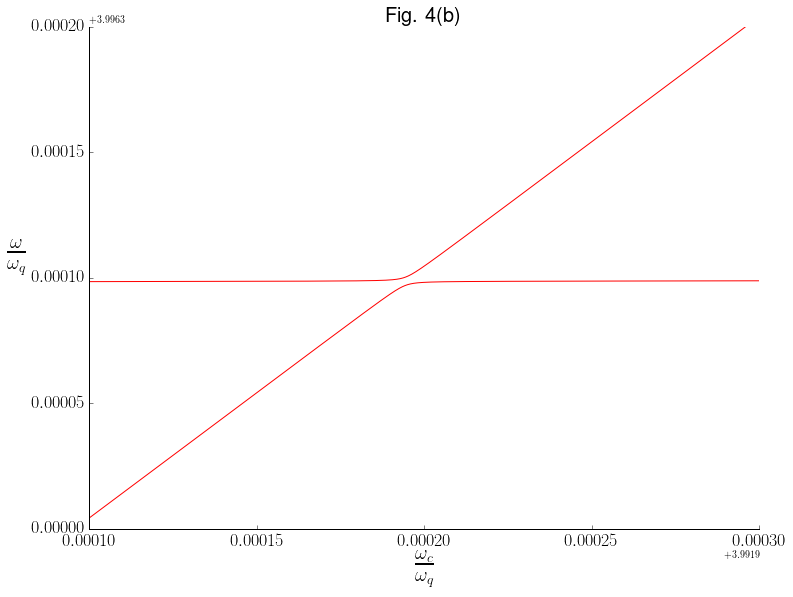

In [596]:
fig, ax = plt.subplots(figsize=(12,9))

for n in [14,15]:
    ax.plot(wclist, evals_wc_sweep[:,n], 'r')

ax.set_ylim([3.9963, 3.9965]);
ax.set_xlim([3.992, 3.9922]);
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18)
plt.title('Fig. 4(b)', fontsize = 20, fontweight = 'semibold')
ax.set_ylabel(r'$\frac{\omega}{\omega_q}$', fontsize=28, fontweight = 550, rotation = 'horizontal', ha = 'right')
ax.set_xlabel(r'$\frac{\omega_c}{\omega_q}$', fontsize=28, fontweight = 550)

In [600]:
w_15_16 = evals_wc_sweep[:,15] - evals_wc_sweep[:,14]

wc_min = wclist[list(w_15_16).index(min(w_15_16))]

w_15_0 = evals_wc_sweep[list(w_15_16).index(min(w_15_16)),14]
w_16_0 = evals_wc_sweep[list(w_15_16).index(min(w_15_16)),15]

In [610]:
# Parameters

mu = 0.006
A = 7
wc = wc_min
tau = 1/(4*(w_16_0-w_15_0))
wd = (w_15_0 + w_16_0)/2

# Kerr and other Hamiltonians

Hc = wc * a.dag() * a
Horig = Hq + Hi + Hc
Hk = mu * a.dag() * a.dag() * a * a
H0 = Horig + Hk

Hdrive = X

def coeff(t, args):
    return A * np.cos(wd * t) * np.exp(-0.5 * (t / tau) ** 2)/(tau * np.sqrt(2*np.pi)) 

omegaEff = (w_16_0 - w_15_0)/2;

evals, ekets = H0.eigenstates()
evals_shifted = [ (np.real(evals)[n] - np.real(evals)[0]) for n in range(1, len(evals))]

ekets = [ekets[15], ekets[16]]

count = 0

for j in range(len(ekets)):
    
    for k in range(len(ekets)):
        
        if k > j : 
            
            if count == 0 :
                
                Xplus = (ekets[j].dag() * X * ekets[k]).full()[0,0] * (ekets[j] * ekets[k].dag())
                Cplus1 = (ekets[j].dag() * C1 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus2 = (ekets[j].dag() * C2 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus3 = (ekets[j].dag() * C3 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus4 = (ekets[j].dag() * C4 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                
            else :
                
                Xplus = Xplus +  (ekets[j].dag() * X * ekets[k]).full()[0,0] * (ekets[j] * ekets[k].dag())
                Cplus1 = Cplus1 + (ekets[j].dag() * C1 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus2 = Cplus2 + (ekets[j].dag() * C2 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus3 = Cplus3 + (ekets[j].dag() * C3 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
                Cplus4 = Cplus4 + (ekets[j].dag() * C4 * ekets[k]).full()[0,0] * ekets[j] * ekets[k].dag()
            
            count += 1;

Xminus = Xplus.dag()
Cminus1 = Cplus1.dag()
Cminus2 = Cplus2.dag()
Cminus3 = Cplus3.dag()
Cminus4 = Cplus4.dag()

H = [H0, [Hdrive, coeff]]

In [612]:
t = (1/omegaEff) * np.linspace(0, np.pi, 100000)

psi0 = tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(N,0))

c_ops = []

output = mesolve(H, psi0, t, c_ops, [Xminus * Xplus, Cminus1 * Cplus1, Cminus1 * Cminus2 * Cminus3 * Cminus4 * Cplus4 * Cplus3 * Cplus2 * Cplus1])

KeyboardInterrupt: 